<a href="https://colab.research.google.com/github/fk5253/Covid-Detection-using-CT-Scan/blob/main/Copy_of_early_detection_of_covid_19_from_chest_x_ray_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Early Detection of COVID-19 from Chest CT-Scan.
# Deep Learning - CNN Model

Hi All,

Here, I created my own deep learning(CNN) model for early detection of COVID-19 from chest CT-Scan images. As a tool, I have used Keras with Tensorflow background, and the model can be improved by addig more convolution and pooling layers, and increasing the number of feature detectors.

In [1]:
#Importing required libraries.
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers
from google.colab import files

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
#Initializing the CNN
#we'll use sequential ANN Model
classifier = Sequential()

#step 1 - Convolution
#creating the feature map by using feature detector from ınput image

classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))
#32 Feature maps&detetctors uses 3 by 3 matrices, we can put 128 in the powerful machines


In [5]:
#data=open("/gdrive/My Drive/Train_data")
#data1=open("/gdrive/My Drive/Dataset")
%cd '/content/gdrive/My Drive/Train_data'

/content/gdrive/My Drive/Train_data


In [6]:
#step -2 Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

#second convolution and pooling steps.
classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))

classifier.add(MaxPooling2D(pool_size = (2,2)))

In [7]:
#step -3 Flattening
classifier.add(Flatten())

In [8]:
#step-4 Full connection step
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))
#binary outcome

In [9]:
#compiling the cnn

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [10]:
#Fitting to CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/Train_data',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/content/gdrive/My Drive/Test_data',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
#We'll try to train with 100 Epochs
results=classifier.fit_generator(
        training_set,
        steps_per_epoch=21,
        epochs=100,
        validation_data=test_set,
        validation_steps=3,verbose=1)

Found 660 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
21/21 [==============================] - 248s 12s/step - loss: 0.6901 - accuracy: 0.5707 - val_loss: 0.6902 - val_accuracy: 0.4643
Epoch 2/100
21/21 [==============================] - 6s 268ms/step - loss: 0.6898 - accuracy: 0.5198 - val_loss: 0.6766 - val_accuracy: 0.5357
Epoch 3/100
21/21 [==============================] - 5s 261ms/step - loss: 0.6907 - accuracy: 0.5345 - val_loss: 0.6787 - val_accuracy: 0.5357
Epoch 4/100
21/21 [==============================] - 5s 259ms/step - loss: 0.6937 - accuracy: 0.5259 - val_loss: 0.6751 - val_accuracy: 0.5357
Epoch 5/100
21/21 [==============================] - 6s 264ms/step - loss: 0.6822 - accuracy: 0.5460 - val_loss: 0.6467 - val_accuracy: 0.7143
Epoch 6/100
21/21 [==============================] - 6s 264ms/step - loss: 0.6684 - accuracy: 0.6204 - val_loss: 0.6479 - val_accuracy: 0.6190
Epoch 7/100
21/21 [==============================] - 6s 263ms/step - loss: 0.6964 - accuracy: 0.5187 - val_loss: 0.6361 - val_accuracy: 0.7143

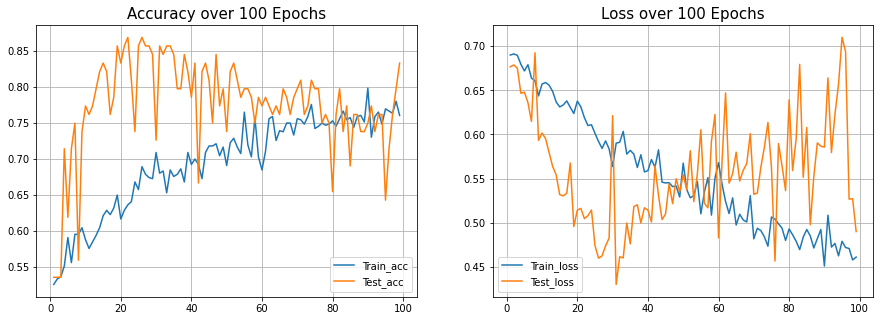

In [11]:
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(results, 100)

In [12]:
# Part 3 - Making new predictions
# Testing
import numpy as np
from keras.preprocessing import image

#First learn the classification indices.
print(training_set.class_indices)


{'covid': 0, 'noncovid': 1}


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


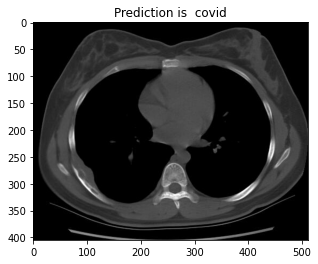

In [19]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('/content/gdrive/My Drive/Dataset/1060.png')
imgplot = plt.imshow(img)

test_image = image.load_img('/content/gdrive/My Drive/Dataset/1060.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction is  '+ prediction )
#There we will test this following image, COVID-19 positive

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


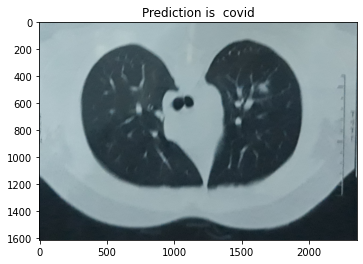

In [21]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('/content/gdrive/My Drive/Dataset/Fk.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

img=mpimg.imread('/content/gdrive/My Drive/Dataset/Fk.jpg')
imgplot = plt.imshow(img)

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
#print("AI's prediction is: "+ prediction)
plt=plt.title('Prediction is  '+ prediction )

#There we will test this following image, COVID-19 positive

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


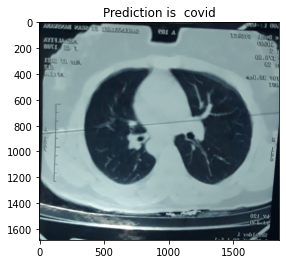

In [15]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('/content/gdrive/My Drive/Dataset/Mom.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

img=mpimg.imread('/content/gdrive/My Drive/Dataset/Mom.jpg')
imgplot = plt.imshow(img)

if result[0][0] == 1:
    prediction = 'normal'
elif result[0][0]==0:
    prediction = 'covid'
    
#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction is  '+ prediction )